## Rentabilidad

1. Consulta de la rentabilidad del producto.
2. Consulta del rentabilidad del empleado.

In [1]:
# Librerias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### 1ra Consulta: Productos Mas Rentables

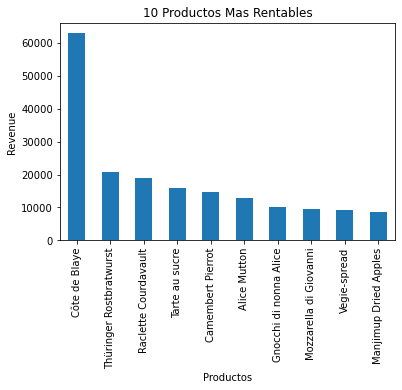

In [16]:
conn = sqlite3.connect("Northwind.db")
query = '''
    SELECT ProductName, SUM(Price * Quantity) AS Revenue
    FROM OrderDetails OD
    JOIN Products P on P.ProductID = OD.ProductID
    GROUP BY OD.ProductID
    ORDER BY Revenue DESC
    LIMIT 10
'''

top_products = pd.read_sql_query(query, conn)
top_products.plot(x = "ProductName", 
                  y = "Revenue", 
                  kind = "bar",
                  legend = False)
plt.title("10 Productos Mas Rentables")
plt.xlabel("Productos")
plt.ylabel("Revenue")
plt.xticks(rotation = 90)
plt.show()

### 2da Consulta: Empleado Mas Rentable

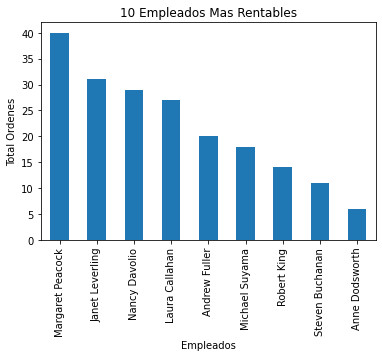

In [17]:
conn = sqlite3.connect("Northwind.db")
query2 = '''
    SELECT FirstName || " " || LastName AS Employee, COUNT(*) AS Total
    FROM Orders O
    JOIN Employees E
    ON E.EmployeeID = O.EmployeeID
    GROUP BY O.EmployeeID
    ORDER BY Total DESC
    LIMIT 10
'''

top_employees = pd.read_sql_query(query2, conn)
top_employees.plot(x = "Employee", 
                  y = "Total", 
                  kind = "bar",
                  legend = False)
plt.title("10 Empleados Mas Rentables")
plt.xlabel("Empleados")
plt.ylabel("Total Ordenes")
plt.xticks(rotation = 90)
plt.show()